<a href="https://colab.research.google.com/github/MIREHMAN/Data-Analysis/blob/main/House_Price_Pridiction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [24]:
df=pd.read_csv('/content/data.csv')

In [25]:
df.drop(['date', 'country','statezip', 'street', 'city'], axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


Data Preprocessing

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

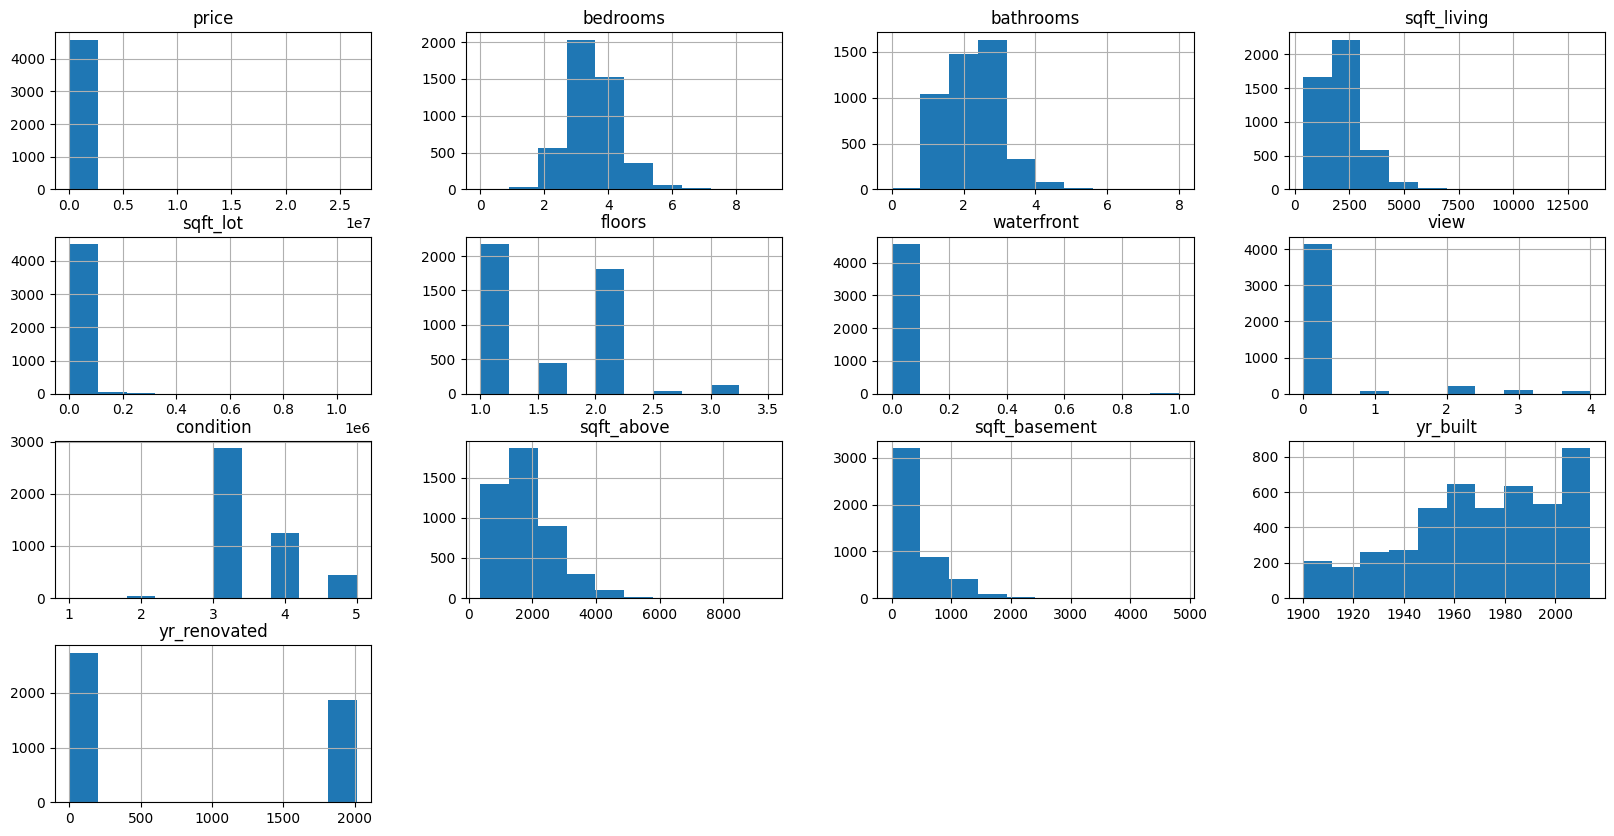

In [27]:
df.hist(figsize=(20,10))

In [28]:
df['bathrooms']=np.log(df['bathrooms']+1)
df['sqft_living']=np.log(df['sqft_living']+1)
df['sqft_above']=np.log(df['sqft_above']+1)
df['sqft_lot']=np.log(df['sqft_lot']+1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

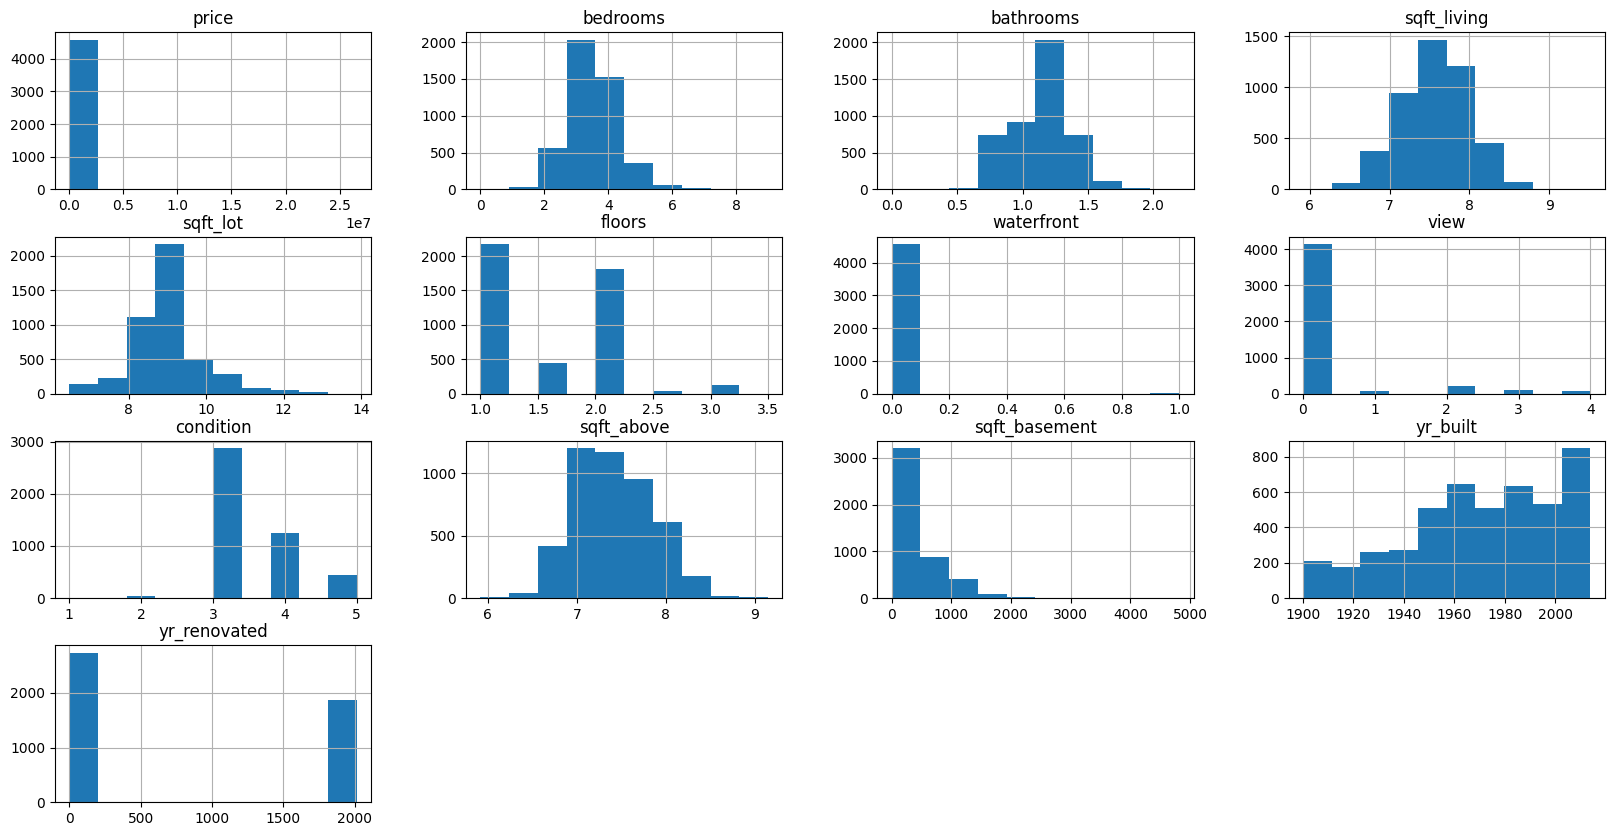

In [29]:
df.hist(figsize=(20,10))

**Feature Engineering**

<Axes: >

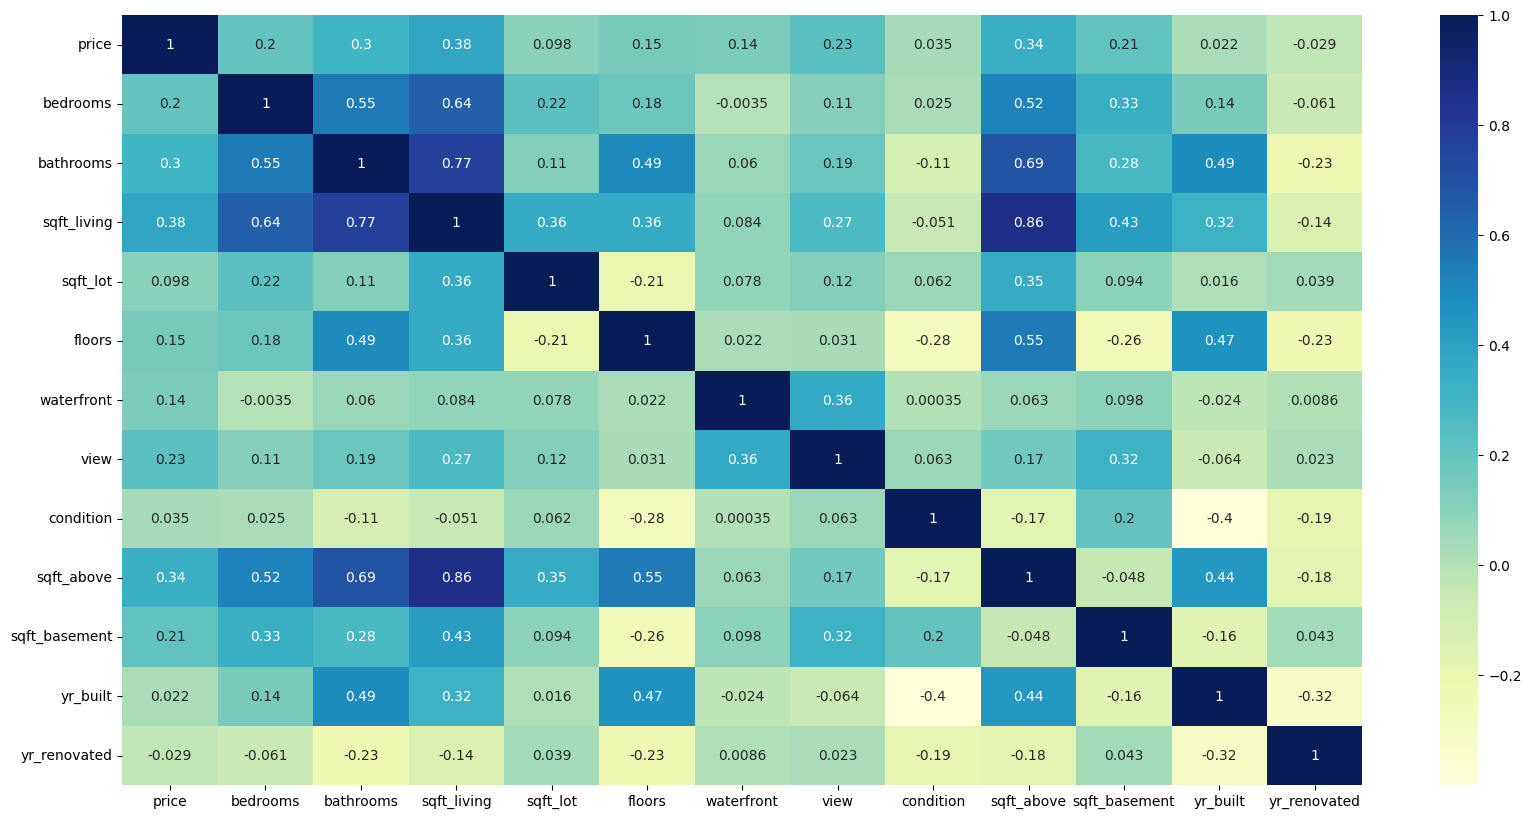

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [31]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,0.916291,7.201171,8.976262,1.5,0,0,3,7.201171,0,1955,2005
1,2.384000e+06,5.0,1.252763,8.202756,9.110631,2.0,0,4,5,8.122965,280,1921,0
2,3.420000e+05,3.0,1.098612,7.565793,9.388319,1.0,0,0,4,7.565793,0,1966,0
3,4.200000e+05,3.0,1.178655,7.601402,8.991064,1.0,0,0,4,6.908755,1000,1963,0
4,5.500000e+05,4.0,1.252763,7.570959,9.259226,1.0,0,0,4,7.039660,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.011601,7.320527,8.757941,1.0,0,0,4,7.320527,0,1954,1979
4596,5.343333e+05,3.0,1.252763,7.286876,8.932477,2.0,0,0,3,7.286876,0,1983,2009
4597,4.169042e+05,3.0,1.252763,8.010028,8.855806,2.0,0,0,3,8.010028,0,2009,0
4598,2.034000e+05,4.0,1.098612,7.645398,8.799511,1.0,0,0,3,6.976348,1020,1974,0


In [33]:
df = df.dropna()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   float64
 4   sqft_lot       4600 non-null   float64
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   float64
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 467.3 KB


In [35]:
X=df.drop(['price'], axis=1)

In [36]:
Y=df['price']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 2316 to 1980
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       3680 non-null   float64
 1   bathrooms      3680 non-null   float64
 2   sqft_living    3680 non-null   float64
 3   sqft_lot       3680 non-null   float64
 4   floors         3680 non-null   float64
 5   waterfront     3680 non-null   int64  
 6   view           3680 non-null   int64  
 7   condition      3680 non-null   int64  
 8   sqft_above     3680 non-null   float64
 9   sqft_basement  3680 non-null   int64  
 10  yr_built       3680 non-null   int64  
 11  yr_renovated   3680 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 373.8 KB


In [39]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [40]:
reg.score(x_test,y_test)

0.4976743913141516

In [41]:
from sklearn.ensemble import RandomForestRegressor

reg2=RandomForestRegressor()
reg2.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
reg2.score(x_test,y_test)

0.40470173143873334